<a href="https://colab.research.google.com/github/Abdur097/PCVK_Genap_2022/blob/main/Pertemuan12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

In [2]:
from google.colab import drive

drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


**ORB Descriptor**

In [3]:
def display(img, cmap='gray'):
  fig = plt.figure(figsize=(12,10))
  ax = fig.add_subplot(111)
  ax.imshow(img,cmap='gray')

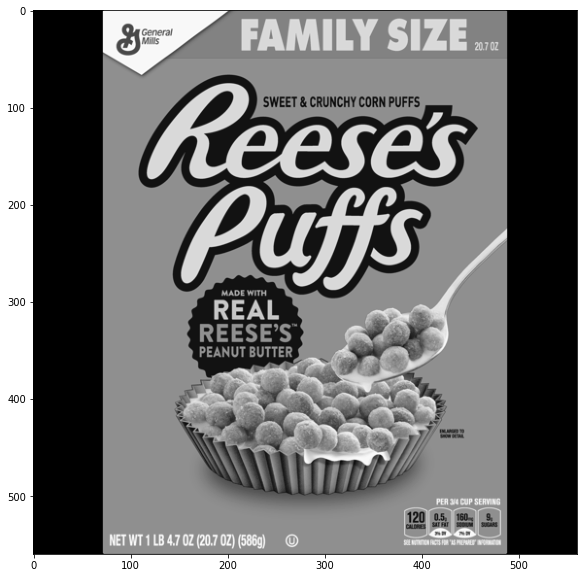

In [4]:
reeses = cv.imread('/content/drive/MyDrive/Tugas_Kuliah/PCVK1/facedet/reeses_puffs.png', 0)
display(reeses)

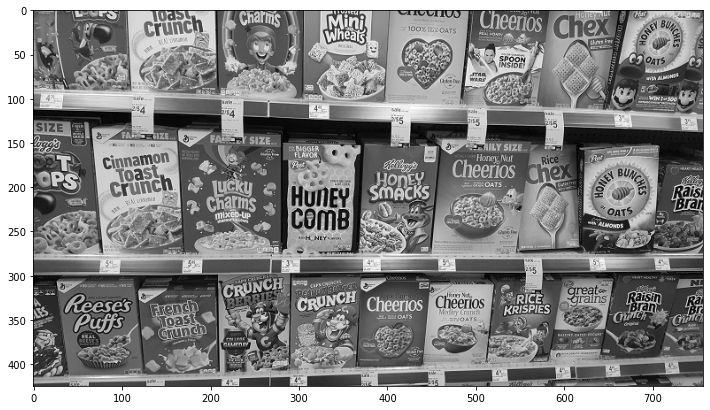

In [5]:
cereals = cv.imread('/content/drive/MyDrive/Tugas_Kuliah/PCVK1/facedet/many_cereals.jpg', 0)
display(cereals)

In [6]:
orb = cv.ORB_create()
kp1,des1 = orb.detectAndCompute(reeses, None)
kp2,des2 = orb.detectAndCompute(cereals, None)
bf = cv.BFMatcher(cv.NORM_HAMMING, crossCheck = True)
matches = bf.match(des1,des2)
single_match = matches[0]
single_match.distance

71.0

In [7]:
len(matches)

139

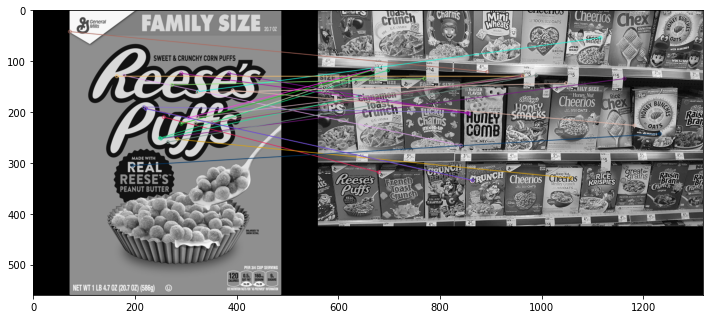

In [8]:
from sys import flags
matches = sorted(matches, key=lambda x:x.distance)
reeses_match = cv.drawMatches(reeses,kp1,cereals,kp2,matches[:25],None, flags=2)
display(reeses_match)

**SIFT Descriptor**

In [15]:
!pip install opencv-contrib-python==4.4.0.44

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [10]:
sift = cv.xfeatures2d.SIFT_create()
kp1,des1 = sift.detectAndCompute(reeses, None)
kp2,des2 = sift.detectAndCompute(cereals, None)
bf = cv.BFMatcher()
matches = bf.knnMatch(des1,des2,k=2)

good = []

# Makin kecil jarak makin cocok
# Ratio match1 < 75% Match2
for match1, match2 in matches:
  #jika jarak match 1 lebih kecil dari jarak 75% match2 descriptor disimpan
  if match1.distance < 0.75*match2.distance:
    good.append([match1])

len(good)

79

In [11]:
len(matches)

1501

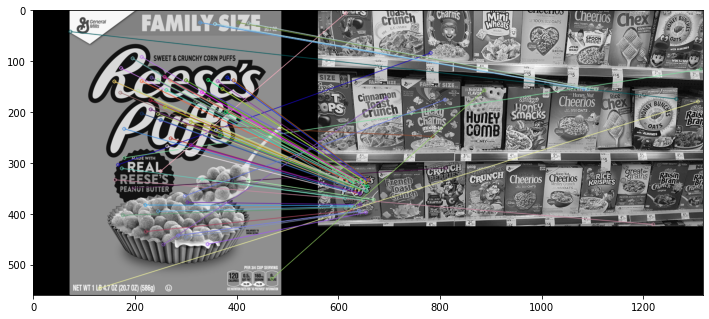

In [12]:
sift_matches = cv.drawMatchesKnn(reeses, kp1, cereals, kp2, good, None, flags=2)
display(sift_matches)

**Tugas**

<Figure size 720x720 with 0 Axes>

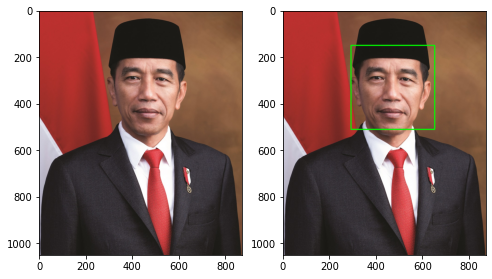

<Figure size 720x720 with 0 Axes>

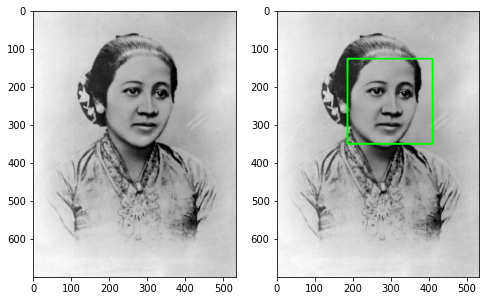

<Figure size 720x720 with 0 Axes>

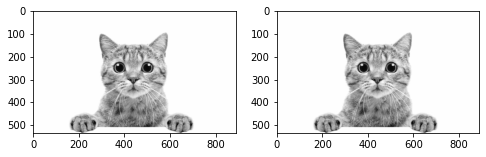

<Figure size 720x720 with 0 Axes>

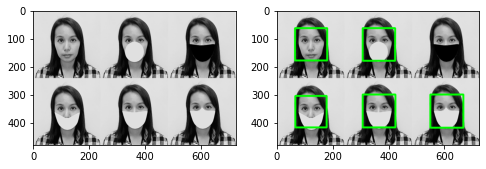

<Figure size 720x720 with 0 Axes>

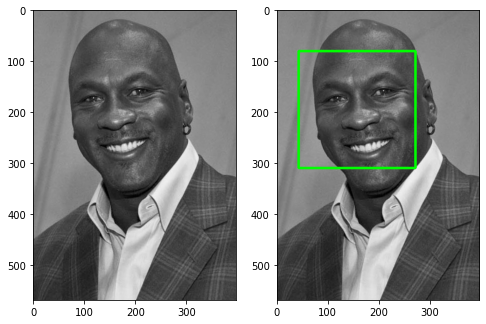

<Figure size 720x720 with 0 Axes>

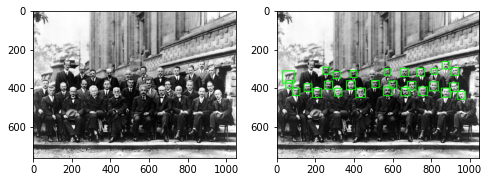

In [17]:
#2 Lakukan Face Detection untuk image object lain yang tersedia pada (/images/facedet)

cascade_wajah = cv.CascadeClassifier('/content/drive/MyDrive/Tugas_Kuliah/PCVK1/haarcascades/haarcascade_frontalface_alt.xml')

jokowi = cv.imread('/content/drive/MyDrive/Tugas_Kuliah/PCVK1/facedet/jokowi.jpg')
jokowi_rgb = cv.cvtColor(jokowi, cv.COLOR_BGR2RGB)
jokowi_fd = jokowi_rgb.copy()

kartini = cv.imread('/content/drive/MyDrive/Tugas_Kuliah/PCVK1/facedet/kartini.jpg',0)
kartini_rgb = cv.cvtColor(kartini, cv.COLOR_BGR2RGB)
kartini_fd = kartini_rgb.copy()

kucing = cv.imread('/content/drive/MyDrive/Tugas_Kuliah/PCVK1/facedet/kucing.jpg',0)
kucing_rgb = cv.cvtColor(kucing, cv.COLOR_BGR2RGB)
kucing_fd = kucing_rgb.copy()

mask = cv.imread('/content/drive/MyDrive/Tugas_Kuliah/PCVK1/facedet/mask.png',0)
mask_rgb = cv.cvtColor(mask, cv.COLOR_BGR2RGB)
mask_fd = mask_rgb.copy()

mjordan = cv.imread('/content/drive/MyDrive/Tugas_Kuliah/PCVK1/facedet/mjordan.jpg',0)
mjordan_rgb = cv.cvtColor(mjordan, cv.COLOR_BGR2RGB)
mjordan_fd = mjordan_rgb.copy()

solvayconf = cv.imread('/content/drive/MyDrive/Tugas_Kuliah/PCVK1/facedet/solvayconf.jpg',0)
solvayconf_rgb = cv.cvtColor(solvayconf, cv.COLOR_BGR2RGB)
solvayconf_fd = solvayconf_rgb.copy()

fd_jokowi = cascade_wajah.detectMultiScale(jokowi_fd)
for(x,y,w,h) in fd_jokowi:
  cv.rectangle(jokowi_fd, (x,y),(x+w,y+h), (0,255,0), 3)
plt.figure(figsize = (10,10))
f, axarr = plt. subplots(1,2,figsize=(8,8))
plt.subplot(121),plt.imshow(jokowi_rgb)
plt.subplot(122),plt.imshow(jokowi_fd)
plt.show()

fd_kartini = cascade_wajah.detectMultiScale(kartini_fd)
for(x,y,w,h) in fd_kartini:
  cv.rectangle(kartini_fd, (x,y),(x+w,y+h), (0,255,0), 3)
plt.figure(figsize = (10,10))
f, axarr = plt. subplots(1,2,figsize=(8,8))
plt.subplot(121),plt.imshow(kartini_rgb,cmap='gray')
plt.subplot(122),plt.imshow(kartini_fd,cmap='gray')
plt.show()

fd_kucing = cascade_wajah.detectMultiScale(kucing_fd)
for(x,y,w,h) in fd_kucing:
  cv.rectangle(kucing_fd, (x,y),(x+w,y+h), (0,255,0), 3)
plt.figure(figsize = (10,10))
f, axarr = plt. subplots(1,2,figsize=(8,8))
plt.subplot(121),plt.imshow(kucing_rgb,cmap='gray')
plt.subplot(122),plt.imshow(kucing_fd,cmap='gray')
plt.show()

fd_mask = cascade_wajah.detectMultiScale(mask_fd)
for(x,y,w,h) in fd_mask:
  cv.rectangle(mask_fd, (x,y),(x+w,y+h), (0,255,0), 5)
plt.figure(figsize = (10,10))
f, axarr = plt. subplots(1,2,figsize=(8,8))
plt.subplot(121),plt.imshow(mask_rgb,cmap='gray')
plt.subplot(122),plt.imshow(mask_fd,cmap='gray')
plt.show()

fd_mjordan = cascade_wajah.detectMultiScale(mjordan_fd)
for(x,y,w,h) in fd_mjordan:
  cv.rectangle(mjordan_fd, (x,y),(x+w,y+h), (0,255,0), 3)
plt.figure(figsize = (10,10))
f, axarr = plt. subplots(1,2,figsize=(8,8))
plt.subplot(121),plt.imshow(mjordan_rgb,cmap='gray')
plt.subplot(122),plt.imshow(mjordan_fd,cmap='gray')
plt.show()

fd_solvayconf = cascade_wajah.detectMultiScale(solvayconf_fd)
for(x,y,w,h) in fd_solvayconf:
  cv.rectangle(solvayconf_fd, (x,y),(x+w,y+h), (0,255,0), 3)
plt.figure(figsize = (10,10))
f, axarr = plt. subplots(1,2,figsize=(8,8))
plt.subplot(121),plt.imshow(solvayconf_rgb,cmap='gray')
plt.subplot(122),plt.imshow(solvayconf_fd,cmap='gray')
plt.show()

<Figure size 720x720 with 0 Axes>

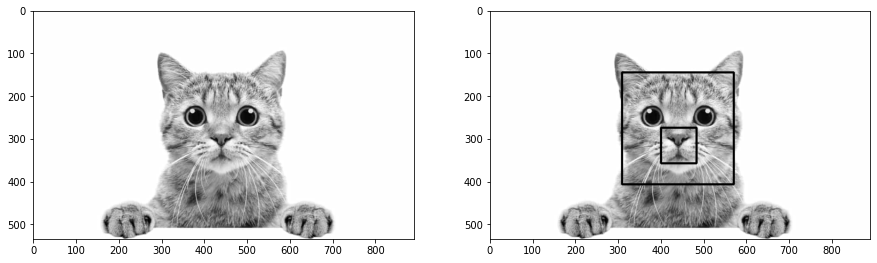

In [19]:
#2 Lakukan deteksi wajah kucing hingga muncul rectangle pada bagian wajahnya. Petunjuk pada soal ini, perhatikan pretrained features yang telah disediakan OpenCV. Gunakan xml yang ada jika memang telah disediakan.

cascade_wajah = cv.CascadeClassifier('/content/drive/MyDrive/Tugas_Kuliah/PCVK1/haarcascades/haarcascade_frontalcatface.xml')

cat_ori = cv.imread('/content/drive/MyDrive/Tugas_Kuliah/PCVK1/facedet/kucing.jpg',0)
cat_detect = cv.imread('/content/drive/MyDrive/Tugas_Kuliah/PCVK1/facedet/kucing.jpg',0)

fd_cat = cascade_wajah.detectMultiScale(cat_detect)
for (x,y,w,h) in fd_cat: 
  cv.rectangle(cat_detect,(x,y),(x+w,y+h),(0,255,0),3) 
plt.figure(figsize = (10,10))

f, axarr = plt. subplots(1,2,figsize=(15,5))
plt.subplot(121),plt.imshow(cat_ori, cmap='gray')
plt.subplot(122),plt.imshow(cat_detect, cmap='gray')
plt.show()

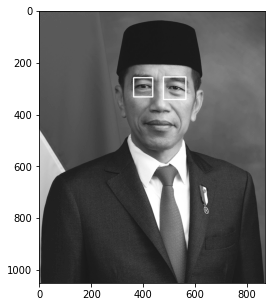

In [20]:
#4 eyes detection

cascade_wajah = cv.CascadeClassifier('/content/drive/MyDrive/Tugas_Kuliah/PCVK1/haarcascades/haarcascade_eye.xml')

jokowi2 = cv.imread('/content/drive/MyDrive/Tugas_Kuliah/PCVK1/facedet/jokowi.jpg',0)
fd_jokowi = cascade_wajah.detectMultiScale(jokowi2)
for(x,y,w,h) in fd_jokowi:
  cv.rectangle(jokowi2, (x,y),(x+w,y+h), (255,255,255), 3)
plt.figure(figsize = (5,5))
plt.imshow(jokowi2, cmap='gray')

<IPython.core.display.Javascript object>

(480, 640)
Saved to photo.jpg


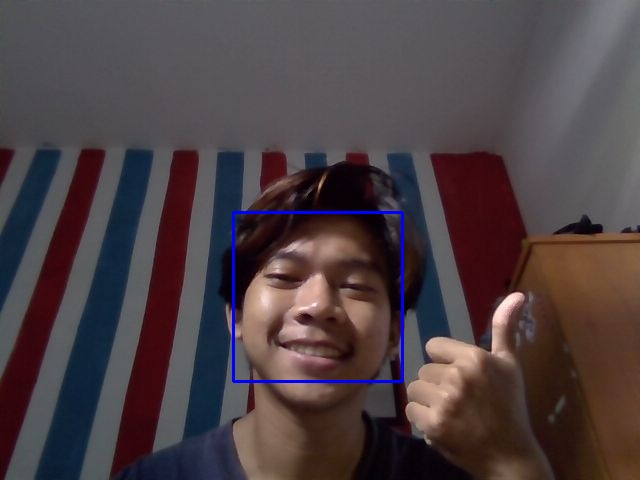

In [25]:
#5 Lakukan Face Tracking menggunakan Google Colab

from IPython.display import display, Javascript, Image
from google.colab.output import eval_js
from base64 import b64decode, b64encode
import io
import PIL
import html
import time

# Helper Function
# function to convert the JavaScript object into an OpenCV image
def js_to_image(js_reply):
  """
  Params:
          js_reply: JavaScript object containing image from webcam
  Returns:
          img: OpenCV BGR image
  """
  # decode base64 image
  image_bytes = b64decode(js_reply.split(',')[1])
  # convert bytes to numpy array
  jpg_as_np = np.frombuffer(image_bytes, dtype=np.uint8)
  # decode numpy array into OpenCV BGR image
  img = cv.imdecode(jpg_as_np, flags=1)

  return img

# function to convert OpenCV Rectangle bounding box image into base64 byte string to be overlayed on video stream
def bbox_to_bytes(bbox_array):
  """
  Params:
          bbox_array: Numpy array (pixels) containing rectangle to overlay on video stream.
  Returns:
        bytes: Base64 image byte string
  """
  # convert array into PIL image
  bbox_PIL = PIL.Image.fromarray(bbox_array, 'RGBA')
  iobuf = io.BytesIO()
  # format bbox into png for return
  bbox_PIL.save(iobuf, format='png')
  # format return string
  bbox_bytes = 'data:image/png;base64,{}'.format((str(b64encode(iobuf.getvalue()), 'utf-8')))

  return bbox_bytes

cascade_wajah = cv.CascadeClassifier('/content/drive/MyDrive/Tugas_Kuliah/PCVK1/haarcascades/haarcascade_frontalface_default.xml')

# Webcam Images
def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript(
      '''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)

  # get photo data
  data = eval_js('takePhoto({})'.format(quality))
  # get OpenCV format image
  img = js_to_image(data) 
  # grayscale img
  gray = cv.cvtColor(img, cv.COLOR_RGB2GRAY)
  print(gray.shape)
  # get face bounding box coordinates using Haar Cascade
  faces = cascade_wajah.detectMultiScale(gray)
  # draw face bounding box on image
  for (x,y,w,h) in faces:
      img = cv.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
  # save image
  cv.imwrite(filename, img)

  return filename

try:
  filename = take_photo('photo.jpg')
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

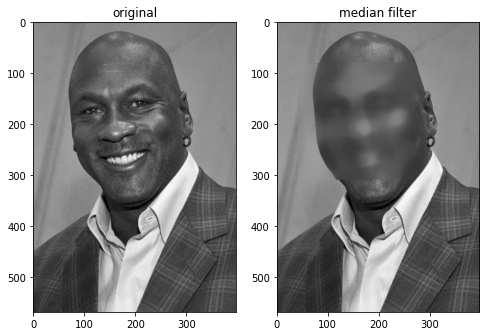

In [26]:
#6 Lakukan Blurring pada bagian wajah yang terdeteksi

cascade_wajah = cv.CascadeClassifier('/content/drive/MyDrive/Tugas_Kuliah/PCVK1/haarcascades/haarcascade_frontalface_alt.xml')

mjordan_ori = cv.imread('/content/drive/MyDrive/Tugas_Kuliah/PCVK1/facedet/mjordan.jpg')
mjordan_grey = cv.cvtColor(mjordan_ori, cv.COLOR_BGR2GRAY)
mjordan_blur = mjordan_grey.copy()

fd_mjordan = cascade_wajah.detectMultiScale(mjordan_blur)
for(x,y,w,h) in fd_mjordan:
  mjordan_blur[y:y+h, x:x+w] = cv.medianBlur(mjordan_blur[y:y+h, x:x+w], 35)
# new_mjordan2 = cv.medianBlur(mjordan2, new_mjordan)
f, axarr = plt. subplots(1,2,figsize=(8,8))
plt.subplot(121), plt.imshow(mjordan_grey, cmap='gray'),plt.title('original')
plt.subplot(122), plt.imshow(mjordan_blur, cmap='gray'),plt.title('median filter')
plt.show()